In [ ]:
# Black Friday DataSet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [ ]:
Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.
 
Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [3]:
df=pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
df.drop(['User_ID'],axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [11]:
data preprocessing

SyntaxError: invalid syntax (1305579858.py, line 1)

In [13]:
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [15]:
#pd.get_dummies(df['Age'])
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7
                        })

print(df['Age'])

0         1
1         1
2         1
3         1
4         7
         ..
550063    6
550064    3
550065    3
550066    7
550067    5
Name: Age, Length: 550068, dtype: int64


In [17]:
# using label_encoder
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Age']=label_encoder.fit_transform(df['Age'])
df['Age'].unique()
                                      
                                      

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [19]:
df.tail(20)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550048,P00371644,1,3,0,C,1,0,20,NaN,NaN,591
550049,P00375436,1,3,15,C,3,0,20,NaN,NaN,473
550050,P00371644,1,3,15,C,4+,1,20,NaN,NaN,368
550051,P00375436,0,2,20,C,3,0,20,NaN,NaN,489
550052,P00375436,1,4,1,B,1,1,20,NaN,NaN,239
550053,P00371644,0,3,7,B,1,0,20,NaN,NaN,371
550054,P00370293,1,3,1,C,3,0,19,NaN,NaN,60
550055,P00372445,1,2,0,A,4+,0,20,NaN,NaN,238
550056,P00375436,1,2,17,C,4+,0,20,NaN,NaN,254
550057,P00370853,1,2,0,C,2,1,19,NaN,NaN,61


In [21]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [23]:

df_city=pd.get_dummies(df['City_Category'])
print(df_city)

            A      B      C
0        True  False  False
1        True  False  False
2        True  False  False
3        True  False  False
4       False  False   True
...       ...    ...    ...
550063  False   True  False
550064  False  False   True
550065  False   True  False
550066  False  False   True
550067  False   True  False

[550068 rows x 3 columns]


In [25]:
# using label_encoder
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['City_Category']=label_encoder.fit_transform(df['City_Category'])
df['City_Category'].unique()

array([0, 2, 1])

In [27]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422
3,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057
4,P00285442,1,6,16,2,4+,0,8,NaN,NaN,7969


In [29]:
## Missing values
df.isnull().sum()


Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [31]:
#focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [33]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [35]:
# replace missing values using mode

In [37]:
  df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [39]:
df['Product_Category_2'].isnull().sum()

0

In [41]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,8.0,NaN,8370
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,0,2,0,12,8.0,NaN,1422
3,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057
4,P00285442,1,6,16,2,4+,0,8,8.0,NaN,7969


In [43]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [45]:
  df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [47]:
df['Product_Category_3'].isnull().sum()

0

In [49]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,8.0,16.0,8370
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,0,2,0,12,8.0,16.0,1422
3,P00085442,0,0,10,0,2,0,12,14.0,16.0,1057
4,P00285442,1,6,16,2,4+,0,8,8.0,16.0,7969


In [51]:
df.shape

(550068, 11)

In [53]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [55]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [57]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,8.0,16.0,8370
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,0,2,0,12,8.0,16.0,1422
3,P00085442,0,0,10,0,2,0,12,14.0,16.0,1057
4,P00285442,1,6,16,2,4,0,8,8.0,16.0,7969


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int32  
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(1), int64(6), object(2)
memory usage: 44.1+ MB


In [61]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,8.0,16.0,8370
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,0,2,0,12,8.0,16.0,1422
3,P00085442,0,0,10,0,2,0,12,14.0,16.0,1057
4,P00285442,1,6,16,2,4,0,8,8.0,16.0,7969


In [63]:
#convert object into integer
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int32  
 5   Stay_In_Current_City_Years  550068 non-null  int32  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(2), int64(6), object(1)
memory usage: 42.0+ MB


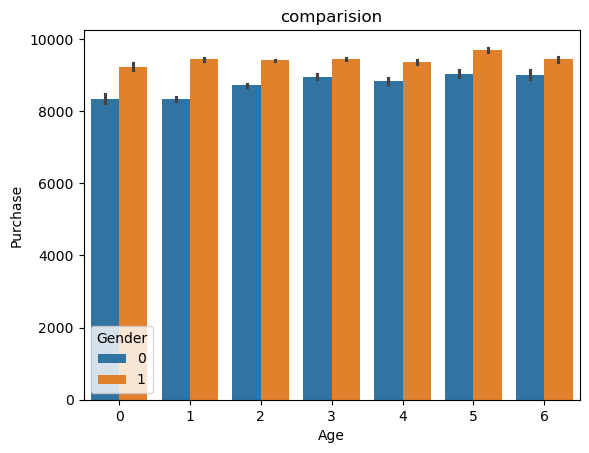

In [83]:
#visualization age vs purchase
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)
plt.title("comparision")
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.show()


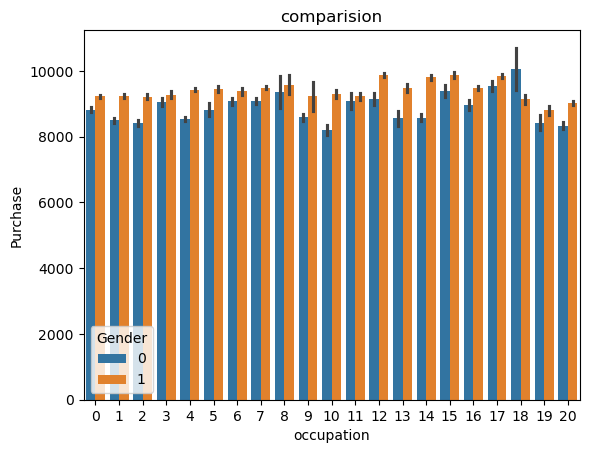

In [85]:
# visualization of purchase with occupation
plt.title("comparision")
plt.xlabel("occupation")
plt.ylabel("Purchase")
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)
plt.show()
           

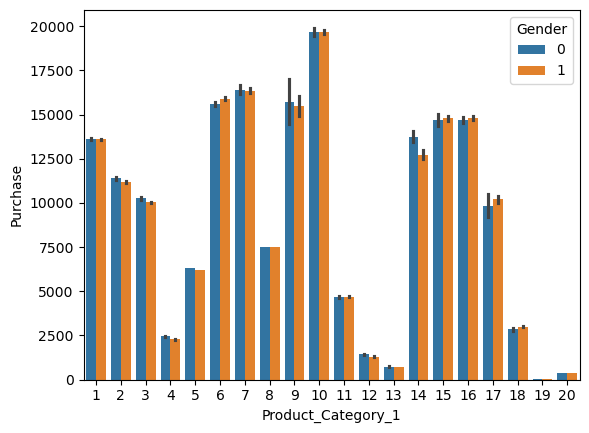

In [79]:
#visua;izatiom of Product_Category_1 vs Purchase
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)
plt.show()

In [87]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,8.0,16.0,8370
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,0,2,0,12,8.0,16.0,1422
3,P00085442,0,0,10,0,2,0,12,14.0,16.0,1057
4,P00285442,1,6,16,2,4,0,8,8.0,16.0,7969


In [119]:
# Feature Scaling
df_test=df[df['Purchase'].isnull()]


In [125]:
print(df_test)

Empty DataFrame
Columns: [Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3, Purchase]
Index: []


In [121]:

df_train=df[~df['Purchase'].isnull()]


In [127]:
print(df_train)

        Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
0            0    0          10              0                           2   
1            0    0          10              0                           2   
2            0    0          10              0                           2   
3            0    0          10              0                           2   
4            1    6          16              2                           4   
...        ...  ...         ...            ...                         ...   
550063       1    5          13              1                           1   
550064       0    2           1              2                           3   
550065       0    2          15              1                           4   
550066       0    6           1              2                           2   
550067       0    4           0              1                           4   

        Marital_Status  Product_Category_1  Product_Category_2 

In [153]:
X=df_train.drop('Purchase',axis=1)

In [155]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,0,3,8.0,16.0
1,0,0,10,0,2,0,1,6.0,14.0
2,0,0,10,0,2,0,12,8.0,16.0
3,0,0,10,0,2,0,12,14.0,16.0
4,1,6,16,2,4,0,8,8.0,16.0


In [157]:
X.shape

(550068, 9)

In [159]:
y=df_train[::-1]

In [161]:
y.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550067,0,4,0,1,4,1,20,8.0,16.0,490
550066,0,6,1,2,2,0,20,8.0,16.0,365
550065,0,2,15,1,4,1,20,8.0,16.0,137
550064,0,2,1,2,3,0,20,8.0,16.0,371
550063,1,5,13,1,1,1,20,8.0,16.0,368


In [163]:
y.shape

(550068, 10)